In [1]:
from google.colab import files
import pandas as pd

print("Please upload 'nutrients_csvfile.csv' located on your computer.")
uploaded = files.upload()

file_name = "nutrients_csvfile.csv"
if file_name in uploaded:
    df = pd.read_csv(file_name)
    print("Dataset successfully loaded!")
    print(df.head())
else:
    print(f"{file_name} not found in uploaded files.")


Please upload 'nutrients_csvfile.csv' located on your computer.


Saving nutrients_csvfile.csv to nutrients_csvfile.csv
Dataset successfully loaded!
                    Food Measure  Grams Calories Protein Fat Sat.Fat Fiber  \
0             Cows' milk   1 qt.    976      660      32  40      36     0   
1              Milk skim   1 qt.    984      360      36   t       t     0   
2             Buttermilk   1 cup    246      127       9   5       4     0   
3  Evaporated, undiluted   1 cup    252      345      16  20      18     0   
4         Fortified milk  6 cups  1,419    1,373      89  42      23   1.4   

  Carbs        Category  
0    48  Dairy products  
1    52  Dairy products  
2    13  Dairy products  
3    24  Dairy products  
4   119  Dairy products  


In [16]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import plotly.offline as py
import plotly.graph_objects as go

In [6]:
nutrients = pd.read_csv("nutrients_csvfile.csv")

In [7]:
nutrients=nutrients.replace("t",0)
nutrients=nutrients.replace("t'",0)

nutrients.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


In [8]:
nutrients=nutrients.replace(",","", regex=True)
nutrients['Fiber']=nutrients['Fiber'].replace("a","", regex=True)
nutrients['Calories'][91]=(8+44)/2

<ipython-input-8-70396eb00051>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  nutrients['Calories'][91]=(8+44)/2


In [9]:
nutrients['Grams']=pd.to_numeric(nutrients['Grams'])
nutrients['Calories']=pd.to_numeric(nutrients['Calories'])
nutrients['Protein']=pd.to_numeric(nutrients['Protein'])
nutrients['Fat']=pd.to_numeric(nutrients['Fat'])
nutrients['Sat.Fat']=pd.to_numeric(nutrients['Sat.Fat'])
nutrients['Fiber']=pd.to_numeric(nutrients['Fiber'])
nutrients['Carbs']=pd.to_numeric(nutrients['Carbs'])

In [10]:
nutrients.dtypes

,0
Food,object
Measure,object
Grams,int64
Calories,float64
Protein,int64
Fat,int64
Sat.Fat,float64
Fiber,float64
Carbs,float64
Category,object


In [11]:
print(nutrients.isnull().any())
print('-'*245)
print(nutrients.describe())
print('-'*245)

Food        False
Measure     False
Grams       False
Calories     True
Protein     False
Fat         False
Sat.Fat      True
Fiber        True
Carbs       False
Category    False
dtype: bool
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
             Grams     Calories     Protein         Fat     Sat.Fat  \
count   335.000000   334.000000  335.000000  335.000000  333.000000   
mean    143.211940   188.802395    8.573134    8.540299    6.438438   
std     138.668626   184.453018   17.733722   19.797871   18.517656   
min      11.000000     0.000000   -1.000000    0.000000    0.000000   
25%      60.000000    75.000000    1.000000    0.000000    0.000000   
50%     108.000000   131.000000    3.000000    1.000000    0.000000   
75%     200.000000   250.000000   12.000000   10.000000    8.0000

In [12]:
nutrients=nutrients.dropna()
nutrients.shape

(331, 10)

<ipython-input-59-fe8633d6556a>:12: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-59-fe8633d6556a>:16: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-59-fe8633d6556a>:20: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-59-fe8633d6556a>:24: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-59-fe8633d6556a>:28: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-59-fe8633d6556a

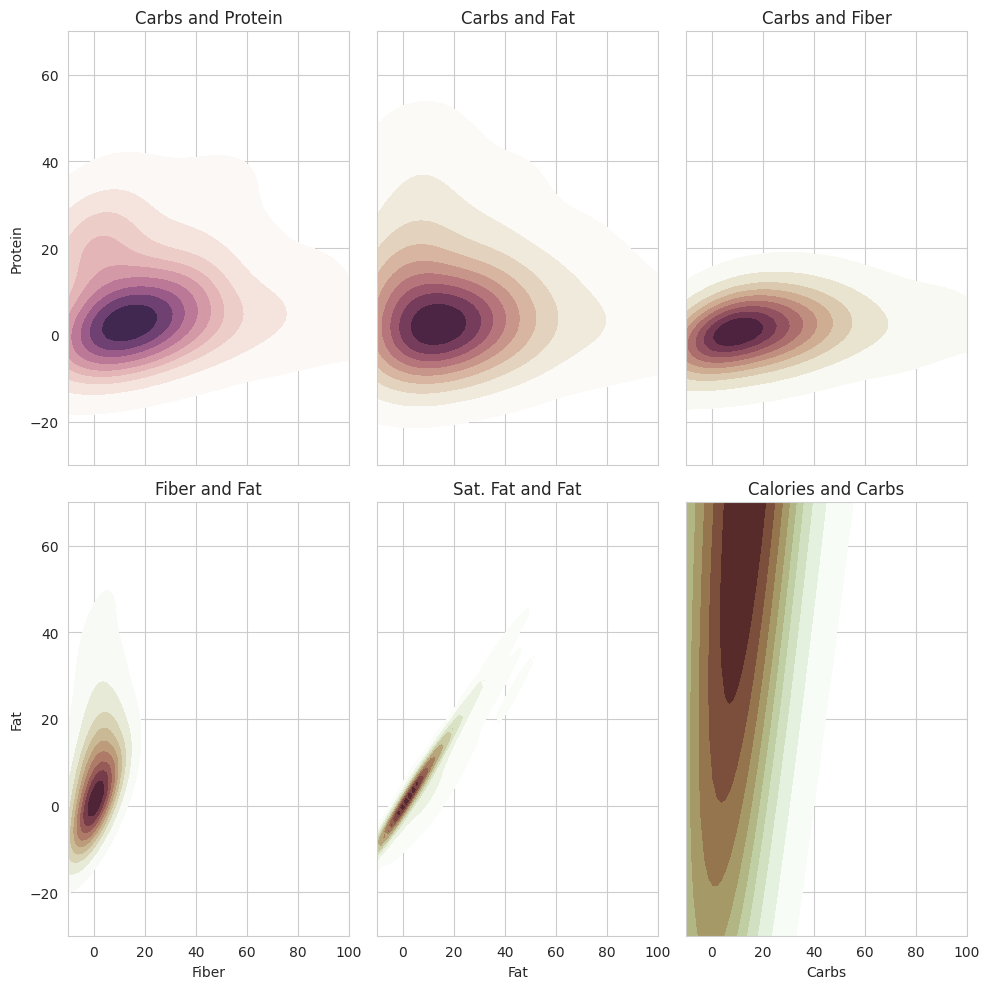

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


f, axes = plt.subplots(2, 3, figsize=(10, 10), sharex=True, sharey=True)

s = np.linspace(0, 3, 10)

cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)
sns.kdeplot(x=nutrients['Carbs'], y=nutrients['Protein'], cmap=cmap, shade=True, ax=axes[0, 0])
axes[0, 0].set(xlim=(-10, 50), ylim=(-30, 70), title='Carbs and Protein')

cmap = sns.cubehelix_palette(start=0.25, light=1, as_cmap=True)
sns.kdeplot(x=nutrients['Carbs'], y=nutrients['Fat'], cmap=cmap, shade=True, ax=axes[0, 1])
axes[0, 1].set(xlim=(-10, 50), ylim=(-30, 70), title='Carbs and Fat')

cmap = sns.cubehelix_palette(start=0.33, light=1, as_cmap=True)
sns.kdeplot(x=nutrients['Carbs'], y=nutrients['Fiber'], cmap=cmap, shade=True, ax=axes[0, 2])
axes[0, 2].set(xlim=(-10, 50), ylim=(-30, 70), title='Carbs and Fiber')

cmap = sns.cubehelix_palette(start=0.45, light=1, as_cmap=True)
sns.kdeplot(x=nutrients['Fiber'], y=nutrients['Fat'], cmap=cmap, shade=True, ax=axes[1, 0])
axes[1, 0].set(xlim=(-10, 50), ylim=(-30, 70), title='Fiber and Fat')

cmap = sns.cubehelix_palette(start=0.56, light=1, as_cmap=True)
sns.kdeplot(x=nutrients['Fat'], y=nutrients['Sat.Fat'], cmap=cmap, shade=True, ax=axes[1, 1])
axes[1, 1].set(xlim=(-10, 50), ylim=(-30, 70), title='Sat. Fat and Fat')

cmap = sns.cubehelix_palette(start=0.68, light=1, as_cmap=True)
sns.kdeplot(x=nutrients['Carbs'], y=nutrients['Calories'], cmap=cmap, shade=True, ax=axes[1, 2])
axes[1, 2].set(xlim=(-10, 100), ylim=(-30, 70), title='Calories and Carbs')

f.tight_layout()
plt.show()

In [20]:
alls=['Vegetables A-E',
 'Vegetables F-P',
 'Vegetables R-Z','Breads cereals fastfoodgrains','Seeds and Nuts']

prot= nutrients[nutrients['Category'].isin(alls)]

protein_rich= prot.sort_values(by='Protein', ascending= False)
top_10=protein_rich.head(10)
fig = px.bar(top_10, x='Food', y='Protein', color='Protein', title=' Top 10 protein rich foods')
fig.show()

In [22]:
cals= nutrients.sort_values(by='Calories', ascending= False)
top_10_cals=cals.head(10)
fig = px.bar(top_10, x='Food', y='Calories' , color='Calories',title=' Top 10 calorie rich foods')
fig.show()

In [23]:
fats= nutrients.sort_values(by='Fat', ascending= False)
top_10_fat=fats.head(10)
fig = px.bar(top_10_fat, x='Food', y='Calories', color='Calories', title=' Fat Content and Calories')
fig.show()

In [24]:
category_dist=nutrients.groupby(['Category']).sum()
category_dist

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs
Category,,,,,,,,,
Breads cereals fastfoodgrains,BiscuitsBran flakesBread cracked wheatRyeWhite...,11 cup1 slice1 slice1-lb. loaf1-lb. loaf1 slic...,5253,11921.0,403,207,99.0,115.91,2059.0
Dairy products,Cows' milkMilk skimButtermilkEvaporated undilu...,1 qt.1 qt.1 cup1 cup6 cups1 cup1 1/3 cups2/3 c...,7412,8434.0,503,396,322.0,4.40,651.0
Desserts sweets,Apple bettyBread puddingCakesChocolate fudgeCu...,1 serving3/4 cup1 slice1 slice11 slice1 slice1...,2958,6608.0,78,163,150.0,20.50,1184.0
DrinksAlcohol Beverages,BeerGinWinesTable (12.2% alcohol)Carbonated dr...,2 cups1 oz.1/2 cup1/2 cup12 oz.12 oz.12 oz.12 ...,3284,1112.0,0,0,0.0,0.00,167.0
Fats Oils Shortenings,YolksButterButterButterHydrogenated cooking fa...,21T.1/2 cup1/4 lb.1/2 cup1/2 cup1/2 cup1 T.1 T...,695,3629.0,234,631,536.0,234.00,239.0
Fish Seafood,ClamsCodCrab meatFish sticks friedFlounderHadd...,3 oz.3 1/2 oz.3 oz.53 1/2 oz.3 oz.3 1/2 oz.1 s...,1807,2757.0,588,338,252.0,235.00,263.0
Fruits A-F,Watercress stems rawApple juice cannedApple vi...,1 cup1 cup1/3 cup1 med1 cup1 cup1/2 cup3 med.1...,3844,3328.0,29,20,12.0,33.50,812.0
Fruits G-P,"Grapefruit sectionsGrapefruit fresh 5"" diamete...",1 cup1/21 cup1 cup1 cup1 cup1/2 cup6-oz. can6-...,5412,4054.0,28,25,21.0,21.10,1009.0
Fruits R-Z,RaisinsRaspberriesRaw redRhubarb sweetenedStra...,1/2 cup1/2 cup3/4 cup1 cup1 cup1 cupI med.1 wedge,1973,1228.0,7,1,0.0,17.40,330.0


In [25]:
category_dist=nutrients.groupby(['Category']).sum()
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=2, cols=3,
    specs=[[{"type": "domain"},{"type": "domain"},{"type": "domain"}],[{"type": "domain"},{"type": "domain"},{"type": "domain"}]])

fig.add_trace(go.Pie(values=category_dist['Calories'].values, title='CALORIES', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=1)

fig.add_trace(go.Pie(values=category_dist['Fat'].values,title='FAT', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=2)

fig.add_trace(go.Pie(values=category_dist['Protein'].values,title='PROTEIN', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=3)

fig.add_trace(go.Pie(values=category_dist['Fiber'].values,title='FIBER', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=1)

fig.add_trace(go.Pie(values=category_dist['Sat.Fat'].values,title='SAT.FAT', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=2)

fig.add_trace(go.Pie(values=category_dist['Carbs'].values,title='CARBS', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=3)
fig.update_layout(title_text="Category wise distribution of all metrics",height=700, width=1000)

fig.show()

In [47]:
drinks= nutrients[nutrients['Category'].isin(['Fish Seafood','Desserts sweets','Drinks Alcohol Beverages'])]
drinks_top=drinks.sort_values(by='Calories', ascending= False)
drinks_top=drinks_top.head(10)

fig = go.Figure(go.Funnelarea(values=drinks_top['Calories'].values, text=drinks_top['Food'],
                              title = { "text": "Desserts with high calorie percentages"},
               marker = {"colors": ["deepskyblue", "lightsalmon", "tan", "teal", "silver","deepskyblue", "lightsalmon", "tan", "teal", "silver"],
                "line": {"color": ["wheat", "wheat", "blue", "wheat", "wheat","wheat", "wheat", "blue", "wheat", "wheat"]}}))



fig.show()

In [32]:
drinks_fatty=drinks.sort_values(by='Fat', ascending= False)
drinks_fatty=drinks_fatty.head(10)

fig = go.Figure(go.Funnelarea(values=drinks_fatty['Fat'].values, text=drinks_fatty['Food'],
                              title = { "text": "Desserts with high fat percentage"},
               marker = {"colors": ["blue", "purple", "pink", "teal", "silver","yellow", "lightsalmon", "tan", "teal", "silver"],
                "line": {"color": ["wheat", "wheat", "blue", "wheat", "wheat","wheat", "wheat", "blue", "wheat", "wheat"]}}))
fig.show()

In [48]:
meat= nutrients[nutrients['Category'].isin(['Fish Seafood','Meat Poultry'])]
meats_top=drinks.sort_values(by='Protein', ascending= False)
meats_top=meats_top.head(10)

fig = go.Figure(go.Pie(values=meats_top['Protein'].values, text=meats_top['Food'],
                              title = { "text": "Desserts with high calorie percentages"},
               marker = {"colors": ["maroon", "salmon", "tan", "gold", "silver","deepskyblue", "lightsalmon", "tan", "teal", "silver"],
                "line": {"color": ["wheat", "wheat", "blue", "wheat", "wheat","wheat", "wheat", "blue", "wheat", "wheat"]}}))
fig.show()

In [49]:
top_10_fattest= meat.sort_values(by='Fat', ascending=False)
top_10_fattest=top_10_fattest.head(10)
fig = go.Figure(data=[go.Scatter(
    x=top_10_fattest['Food'], y=top_10_fattest['Fat'],
    mode='markers',
    marker_size=[200,180,160,140,120, 100 ,80 , 60 ,40,20])
])
fig.update_layout(title='Meat/Seafood with high Fat Content')
fig.show()

In [50]:
top_10_fibrous= meat.sort_values(by='Fiber', ascending=False)
top_10_fibrous=top_10_fibrous.head(10)
top_10_fibrous

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
82,Oysters,6-8 med.,230,231.0,232,233,234.0,235.0,236.0,Fish Seafood
43,Bacon,2 slices,16,95.0,4,8,7.0,0.0,1.0,Meat Poultry
78,Halibut,3 1/2 oz.,100,182.0,26,8,0.0,0.0,0.0,Fish Seafood
69,Turkey,3 1/2 oz.,100,265.0,27,15,0.0,0.0,0.0,Meat Poultry
70,Veal,3 oz.,85,185.0,23,9,8.0,0.0,0.0,Meat Poultry
71,Roast,3 oz.,85,305.0,13,14,13.0,0.0,0.0,Meat Poultry
72,Clams,3 oz.,85,87.0,12,1,0.0,0.0,2.0,Fish Seafood
73,Cod,3 1/2 oz.,100,170.0,28,5,0.0,0.0,0.0,Fish Seafood
74,Crab meat,3 oz.,85,90.0,14,2,0.0,0.0,1.0,Fish Seafood
75,Fish sticks fried,5,112,200.0,19,10,5.0,0.0,8.0,Fish Seafood


In [51]:
top_10_fibrous= meat.sort_values(by='Fiber', ascending=False)
top_10_fibrous=top_10_fibrous.head(10)
top_10_fibrous

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
82,Oysters,6-8 med.,230,231.0,232,233,234.0,235.0,236.0,Fish Seafood
43,Bacon,2 slices,16,95.0,4,8,7.0,0.0,1.0,Meat Poultry
78,Halibut,3 1/2 oz.,100,182.0,26,8,0.0,0.0,0.0,Fish Seafood
69,Turkey,3 1/2 oz.,100,265.0,27,15,0.0,0.0,0.0,Meat Poultry
70,Veal,3 oz.,85,185.0,23,9,8.0,0.0,0.0,Meat Poultry
71,Roast,3 oz.,85,305.0,13,14,13.0,0.0,0.0,Meat Poultry
72,Clams,3 oz.,85,87.0,12,1,0.0,0.0,2.0,Fish Seafood
73,Cod,3 1/2 oz.,100,170.0,28,5,0.0,0.0,0.0,Fish Seafood
74,Crab meat,3 oz.,85,90.0,14,2,0.0,0.0,1.0,Fish Seafood
75,Fish sticks fried,5,112,200.0,19,10,5.0,0.0,8.0,Fish Seafood


In [60]:
trace1 = go.Scatter3d(
    x=nutrients['Category'].values,
    y=nutrients['Food'].values,
    z=nutrients['Fat'].values,
    text=nutrients['Food'].values,
    mode='markers',
    marker=dict(
        sizemode='diameter',
         sizeref=750,
        color = nutrients['Fat'].values,
        colorscale = 'Portland',
        colorbar = dict(title = 'Total Fat (% Daily Value)'),
        line=dict(color='rgb(255, 255, 255)')
    )
)
data=[trace1]
layout=dict(height=800, width=800, title='3D Scatter Plot of Fatty foods (% Daily Value)')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [53]:
trace1 = go.Scatter3d(
    x=nutrients['Category'].values,
    y=nutrients['Food'].values,
    z=nutrients['Carbs'].values,
    text=nutrients['Food'].values,
    mode='markers',
    marker=dict(
        sizemode='diameter',
         sizeref=750,
        color = nutrients['Carbs'].values,
        colorscale = 'Portland',
        colorbar = dict(title = 'Total Fat (% Daily Value)'),
        line=dict(color='rgb(255, 255, 255)')
    )
)
data=[trace1]
layout=dict(height=800, width=800, title='3D Scatter Plot of Carbohydrate rich food')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

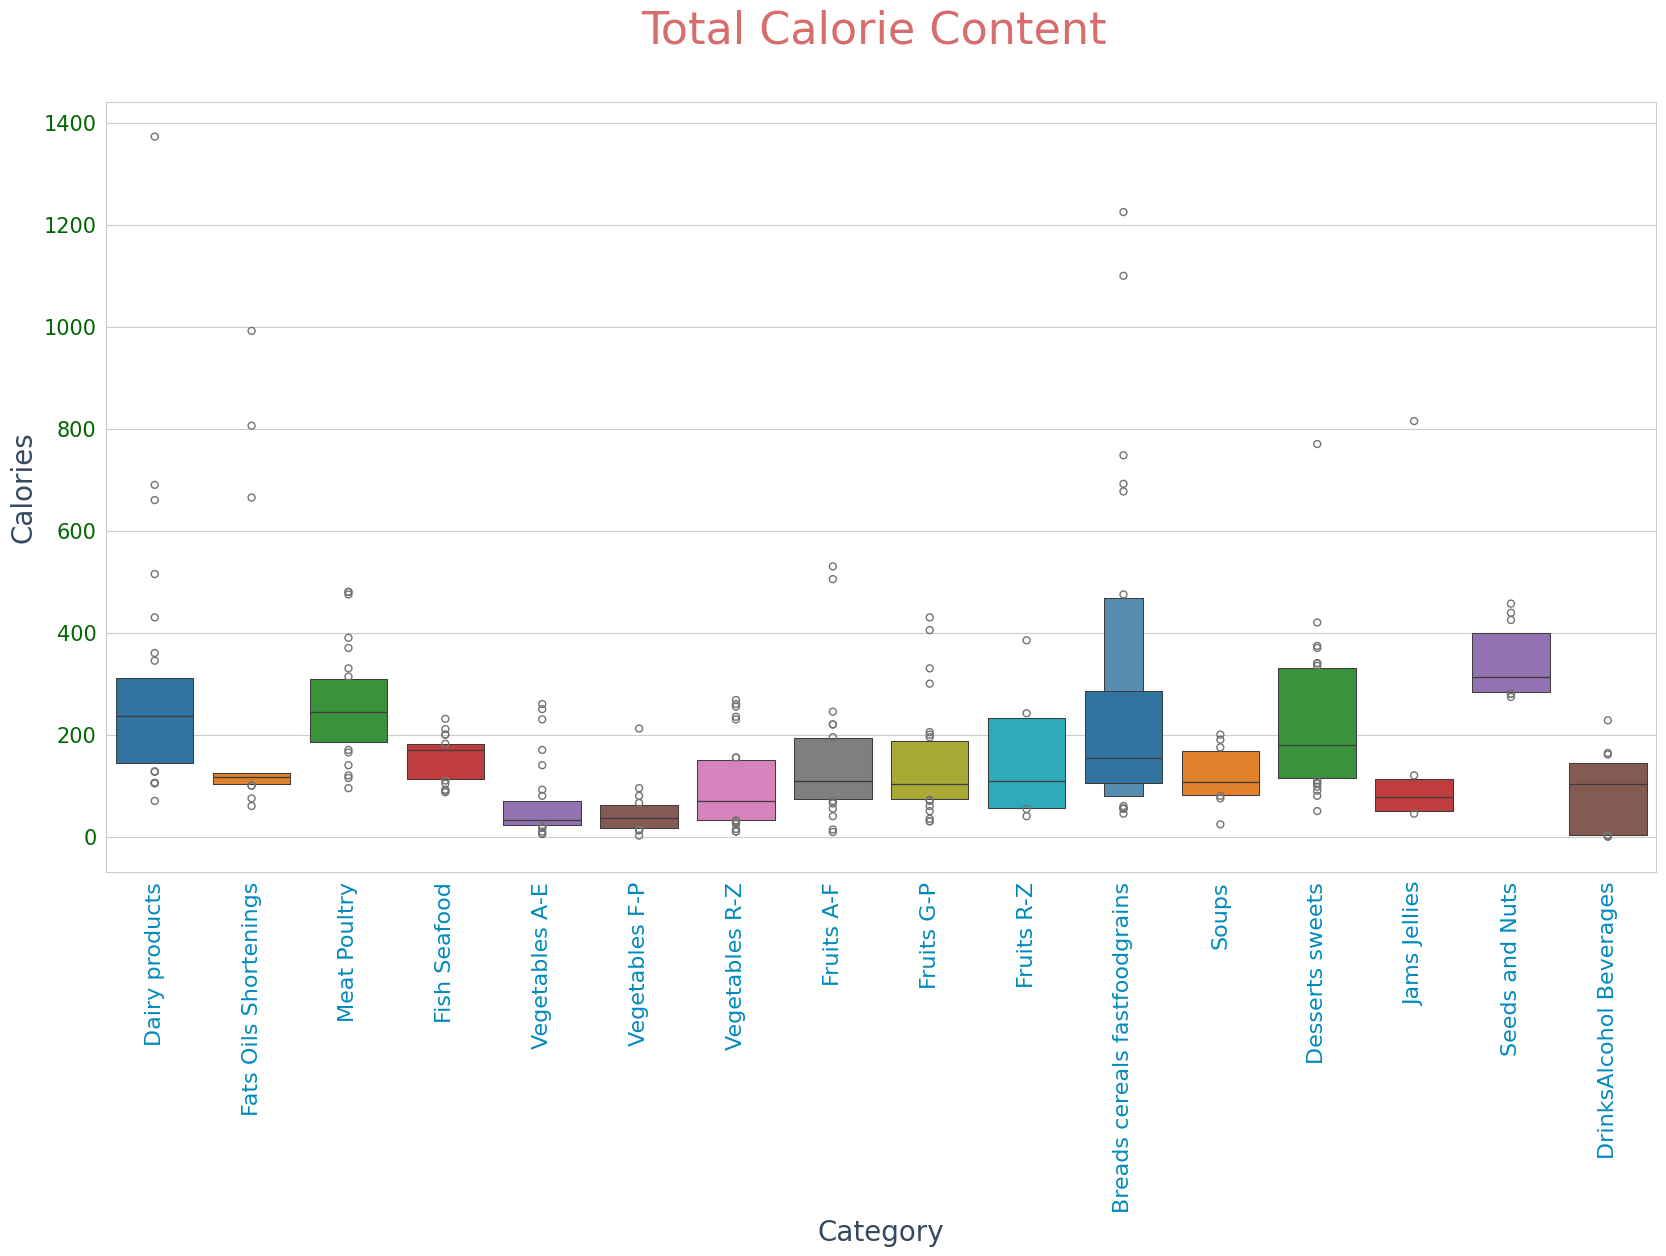

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize=(20, 10))

ax = sns.boxenplot(
    x="Category",
    y="Calories",
    data=nutrients,
    hue="Category",
    dodge=False,
    palette="tab10",
    legend=False
)

for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0.9))
plt.title("Total Calorie Content \n", loc="center", size=32, color='#be0c0c', alpha=0.6)
plt.xlabel('Category', color='#34495E', fontsize=20)
plt.ylabel('Calories', color='#34495E', fontsize=20)

plt.xticks(size=16, color='#008abc', rotation=90)
plt.yticks(size=15, color='#006600')

plt.show()
